<a href="https://colab.research.google.com/github/mashuzza/SQL/blob/master/Building_a_deep_network_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/MyDrive/Spring2021/data.zip



Streaming output truncated to the last 5000 lines.
  inflating: data/dogs_and_cats/train/cats/9f81b0ac1dd893d6.jpg  
  inflating: data/dogs_and_cats/train/cats/9f6bc2c234608be0.jpg  
  inflating: data/dogs_and_cats/train/cats/5e3278e9c0225806.jpg  
  inflating: data/dogs_and_cats/train/cats/7617175544037c14.jpg  
  inflating: data/dogs_and_cats/train/cats/04f874a658135aa8.jpg  
  inflating: data/dogs_and_cats/train/cats/8e3d07bbd0047d28.jpg  
  inflating: data/dogs_and_cats/train/cats/d6bd0b388fe606b5.jpg  
  inflating: data/dogs_and_cats/train/cats/45456cd6797b0018.jpg  
  inflating: data/dogs_and_cats/train/cats/02e2389212a0971e.jpg  
  inflating: data/dogs_and_cats/train/cats/8b4531c4c812d536.jpg  
  inflating: data/dogs_and_cats/train/cats/68f4e915c5cc9f07.jpg  
  inflating: data/dogs_and_cats/train/cats/84901d94df07d472.jpg  
  inflating: data/dogs_and_cats/train/cats/759ca185468be506.jpg  
  inflating: data/dogs_and_cats/train/cats/00b33491ae95d29c.jpg  
  inflating: data/dogs_an

In [ ]:

import torch
# Making sure we can find the data loader
import sys
sys.path.append('..')
sys.path.append('../..')
from data import load

In [ ]:
# Let's load the dataset
train_data, train_label = load.get_dogs_and_cats_data(resize=(32,32), n_images=100)
input_size = 32*32*3
to_image = load.to_image_transform()

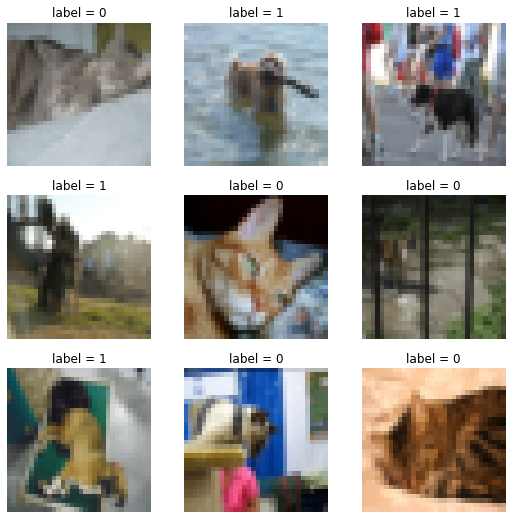

In [ ]:
figure(figsize=(9,9))
for i, (data, label) in enumerate (zip(train_data[:9], train_label[:9])):
  subplot(3,3, i +1)
  imshow(to_image(data))
  title('label = %d'%label)
  axis('off')

In [ ]:
##define the deep network

class Network1(torch.nn.Module):
  def __init__(self, n_hidden = 100):
    super().__init__()
    self.linear1 = torch.nn.Linear(input_size, n_hidden)
    self.linear2 = torch.nn.Linear(n_hidden, 1) ## this will predict whether the image is dog or cat
    self.activation = torch.nn.ReLU()

  def forward (self, x):
    ##x.view(0),-1 is flattening the impage along the first dimension (that's the -1)
      return self.linear2(self.activation(self.linear1(x.view(x.size(0),-1))))

In [ ]:
net1 = Network1(100)
print(net1(train_data).view(-1).detach().numpy())

[-0.11565275 -0.1298233  -0.08072796 -0.1316725  -0.06754797 -0.03469914
 -0.05016441 -0.07686564 -0.16468155 -0.1010937  -0.11046388 -0.11995745
 -0.078641   -0.18603331 -0.07496561 -0.1046083  -0.18150409 -0.1030317
 -0.03354245 -0.10164387 -0.1407422  -0.05377053 -0.09638527 -0.06309126
 -0.19241521 -0.18521681 -0.19691536 -0.12453905 -0.09684904 -0.15428083
 -0.07702789 -0.0536135  -0.05991209 -0.04702056 -0.07723925 -0.07294314
 -0.10136197 -0.18624738 -0.05716129 -0.04026312 -0.10428115 -0.08226295
 -0.09227448 -0.02389616 -0.06468319 -0.1560905  -0.15215918 -0.08102314
 -0.08032991 -0.09793987 -0.07723027 -0.08333778 -0.14269677 -0.12647688
 -0.09671723 -0.17591825 -0.12295286 -0.09452894 -0.07099789 -0.16853619
 -0.06103025 -0.11013398 -0.10589276 -0.08318169 -0.04314803 -0.17814969
 -0.01937979 -0.17535324 -0.06270678 -0.06608103 -0.10460681 -0.05863162
 -0.0424448  -0.15872839 -0.12427727 -0.11872936 -0.10961748 -0.09349477
 -0.20937717 -0.04065297 -0.10450316 -0.19669841 -0.

In [ ]:
## automate script to have arbitrary number of hidden layers

class Network2(torch.nn.Module):
  ## *hidden gives you as many arguments as you want and stores them in a list
  def __init__(self, *n_hidden):
    super().__init__()
    ##create a list for the linear layesr and iterate
    layer = []
    ##input size of the first layer is the input size of the image itself.
    in_size = input_size 
    for h in n_hidden:
      layer.append(torch.nn.Linear(in_size, h))
      ##input size of the next layer is the output size of the current layer
      in_size = h
      ## after each linear layer append a non-linear layer:
      layer.append(torch.nn.ReLU())
    self.network = torch.nn.Sequential(*layer)
    ##create a classification layer 
    ##takes the output of this network and produces one single output
    self.classifier = torch.nn.Linear(in_size, 1)

  def forward (self, x):
    ##x.view(0),-1 is flattening the impage along the first dimension (that's the -1)
      return self.classifier(self.network(x.view(x.size(0),-1)))

In [ ]:
net2 = Network2(100, 50, 20)
print(net2(train_data).view(-1).detach().numpy())

[0.04781774 0.04579165 0.05619095 0.05352324 0.04595499 0.04498036
 0.05139247 0.04396727 0.04531806 0.0498267  0.04750643 0.0600731
 0.03810158 0.05820796 0.05266846 0.04835771 0.04139929 0.05853519
 0.05572406 0.0487909  0.0447988  0.0496643  0.04693286 0.04432821
 0.05739577 0.05450776 0.05339765 0.05048047 0.0524895  0.04414681
 0.05233372 0.06133538 0.05409412 0.0490287  0.0509867  0.05129206
 0.03361968 0.0523753  0.05361234 0.05690687 0.04925869 0.04660726
 0.06346075 0.04540694 0.05578701 0.05544236 0.05775415 0.05388634
 0.03975171 0.0521617  0.05949195 0.05036459 0.04759669 0.04516061
 0.04424185 0.05206789 0.04400693 0.03842398 0.05038098 0.03692078
 0.05407306 0.05402696 0.05469892 0.04372991 0.04778539 0.04784318
 0.03736405 0.05497196 0.05013552 0.051337   0.05690486 0.04616126
 0.05421387 0.0462909  0.04393776 0.06229366 0.04550586 0.06424856
 0.05385004 0.05299081 0.05349698 0.05390322 0.05210218 0.05540948
 0.04892049 0.0587851  0.04756029 0.05242645 0.0435595  0.05626

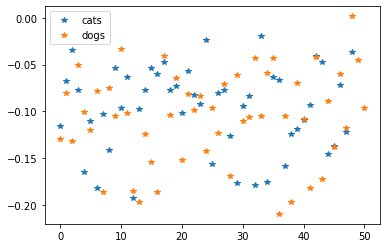

In [ ]:
## see how well the network predicts certain values:
plot(net1(train_data[train_label == 0]).view(-1).detach().numpy(), '*', label = 'cats')
plot(net1(train_data[train_label == 1]).view(-1).detach().numpy(), '*', label = 'dogs')
legend()